## Welcome to the Usecase Challenge on time series analysis...


## Instructions
- Follow the instructions and write your code 
- Press 'Shift+Enter' or use the Run Button to run each cell
- This Python Notebook contains everything you'll need to finish this challenge.
- Before submit your notebook. Restart the kernel and run all the cell. Make sure that any cell shouldn't cause any error or problem.
- Make sure not to delete any of the cells

### Importing packages

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()
import warnings
warnings.filterwarnings('ignore')
import scipy.stats
import pylab
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARMA

### Reading the Data

 Read the data and set the index as ObservationDate and then save the dataframe in 'df' variable

In [5]:
#Read the data and set the index as ObservationDate and then save the dataframe in 'df' variable
#write your code here

df=pd.read_csv('covid19_data.csv',parse_dates=['ObservationDate'],index_col='ObservationDate')
df.head()

,State,Country,LastUpdate,Confirmed,Deaths,Recovered
ObservationDate,,,,,,
2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1,0,0
2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1,0,0
2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0,0,0


### Question 1

Create a graph that depicts the recovered cases and save it in the A1 variable.

### Instructions
- Give fig size as (10,5)
- Title must be present
- type of A1 will be matplotlib.axes._subplots.AxesSubplot

**Hint:** :  data.plot(figsize =(),title = " ")

**Sample image:**
    
<img src='Sample_images/Pic1.png' style='width:600px;height:400px'>

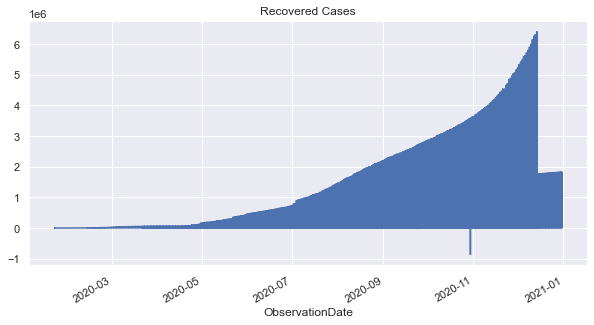

In [6]:
#write your code here

A1 = df['Recovered'].plot(figsize =(10,5),title = "Recovered Cases")



### Question 2

Create a probability plot with Deaths cases and save it as an A2 variable.

**Hint:** Use scipy.stats.probplot(data, plot = pylab)                    

**Sample image:**
    
<img src='Sample_images/Pic2.png' style='width:600px;height:400px'>

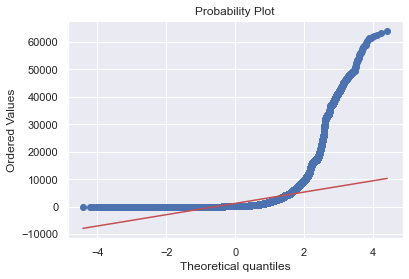

In [7]:
#write your code here

A2 = scipy.stats.probplot(df.Deaths, plot = pylab)



### Question 3

Run the below cell to filter the confirmed cases related to 'Hong Kong' Country

In [8]:
data = df[(df.Country == 'Hong Kong')].Confirmed

List all confirmed cases from 2020-01-22 to 2020-01-31 using the data filtered in the previous step. And assign the resulting series to variable 'A3'

In [10]:
#write your code here

A3 =data['2020-01-22' : '2020-01-31']
A3


ObservationDate
2020-01-22     0
2020-01-23     2
2020-01-24     2
2020-01-25     5
2020-01-26     8
2020-01-27     8
2020-01-28     8
2020-01-29    10
2020-01-30    10
2020-01-31    12
Name: Confirmed, dtype: int64

### Question 4

Verify stationarity on recovered cases using the adfuller technique and return the result to variable 'A4'

**Hint:** sts.adfuller(data)

In [13]:
#write your code here

A4 = sts.adfuller(df.Recovered)
A4


(-32.24772088601884,
 0.0,
 74,
 139899,
 {'1%': -3.43039674386515,
  '5%': -2.861560660120993,
  '10%': -2.5667809966481445},
 3701031.6922185207)

### Question 5

Perform Seasonal Decompose on confirmed cases using additive method and save it in A5 varaible

#### Instuctions:
- Put figsize as (10,5)
- Take freq as 3
- Store the output plot in A5 variable
- **Note:** Type of A5 must be 'matplotlib.figure.Figure'

**Sample image:**
    
<img src='Sample_images/Pic3.png' style='width:600px;height:400px'>

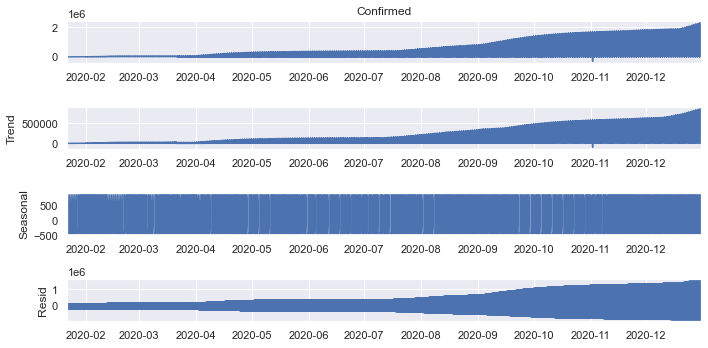

In [14]:
#Additive Decompose
#write your code here

result_add = seasonal_decompose(x=df.Confirmed, model='additive',freq=3)

plt.rcParams.update({'figure.figsize': (10,5)})
A5 =result_add.plot()


### Question 6

Create AutoCorrelation plot on Death cases and save it in A6 variable

#### Instructions:
- Take Lags as 40 and Zero as False
- Title must be present and Font size is 20
- Store the output plot in A6 variable
- **Note:** Type of A6 must be 'matplotlib.figure.Figure'
   

**Sample image:**
    
<img src='Sample_images/Pic4.png' style='width:600px;height:400px'>

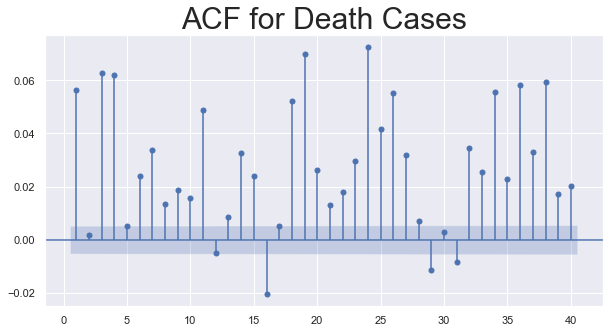

In [15]:
#write your code here


A6 = sgt.plot_acf(df.Deaths,lags=40,zero=False)

title = plt.title('ACF for Death Cases', size=30)
plt.show()


### Question 7

Create Partial AutoCorrelation plot on Death cases and save it in A7 variable

#### Instructions:
- Take Lags as 40, Zero as False and method as 'ols
- Title must be present and Font size is 20
- Store the output plot in A7 variable
- **Note:** Type of A7 must be 'matplotlib.figure.Figure'

**Sample image:**
    
<img src='Sample_images/Pic5.png' style='width:600px;height:400px'>

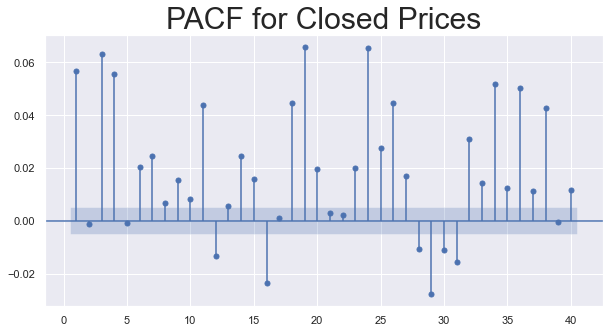

In [16]:
#write your code here

#Partial AutoCorrelation Function



A7 = sgt.plot_pacf(df.Deaths,lags=40,method='ols',zero=False)

title = plt.title('PACF for Closed Prices', size=30)
plt.show()




### Question 8

Print the summary of auto regression fitted model on confirmed cases using summary() function and store the result in A8 variable.

**Note:** Type of A8 must be 'statsmodels.iolib.summary.Summary'

### $ x_t = C + \phi * x_{t-1} + \epsilon_t  $

In [17]:
#write your code here

model_ar=ARMA(df.Confirmed,order=(1,0))
result_ar=model_ar.fit()

A8 =result_ar.summary()
A8

G:\MachineLearning\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:              Confirmed   No. Observations:               139974
Model:                     ARMA(1, 0)   Log Likelihood            -1833600.777
Method:                       css-mle   S.D. of innovations         118260.210
Date:                Fri, 24 Sep 2021   AIC                        3667207.555
Time:                        19:46:45   BIC                        3667237.102
Sample:                             0   HQIC                       3667216.388
                                                                              
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.892e+04    333.200    116.794      0.000    3.83e+04    3.96e+04
ar.L1.Confirmed     0.0513      0.003     19.234      0.000       0.046       0.057
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           19.4773           +0.0000j           19.4773            0.0000
-----------------------------------------------------------------------------
"""

### Question 9

Print the summary of moving average fitted model on confirmed cases using summary() function and store the result in A9 variable.

**Note:** Type of A9 must be 'statsmodels.iolib.summary.Summary'

## $ r_t = C + \theta_1 * \epsilon_{t-1} + \epsilon_{t} $

In [19]:
#write your code here
model_mr=ARMA(df.Confirmed,order=(0,1))
result_mr=model_mr.fit()

A9 =result_mr.summary()
A9

G:\MachineLearning\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:              Confirmed   No. Observations:               139974
Model:                     ARMA(0, 1)   Log Likelihood            -1833618.834
Method:                       css-mle   S.D. of innovations         118275.467
Date:                Fri, 24 Sep 2021   AIC                        3667243.669
Time:                        19:47:28   BIC                        3667273.216
Sample:                             0   HQIC                       3667252.502
                                                                              
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.892e+04    330.812    117.637      0.000    3.83e+04    3.96e+04
ma.L1.Confirmed     0.0464      0.003     18.251      0.000       0.041       0.051
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1          -21.5376           +0.0000j           21.5376            0.5000
-----------------------------------------------------------------------------
"""

### Run the below cell without modifying to save your answers

In [20]:
import pickle

def pickle1(covid19, obj):
    with open(covid19,'wb')as f:
        pickle.dump(obj,f,pickle.HIGHEST_PROTOCOL)   

def pickling():
    try:
        pickle1('A1.pickle',A1)
    except:
        print('A1 variale is not defined. Please check the variable')
    try:
        pickle1('A2.pickle',A2)
    except:
        print('A2 variale is not defined. Please check the variable')
    try:
        pickle1('A3.pickle',A3)
    except:
        print('A3 variale is not defined. Please check the variable')
    try:
        pickle1('A4.pickle',A4)
    except:
        print('A4 variale is not defined. Please check the variable')
    try:
        pickle1('A5.pickle',A5)
    except:
        print('A5 variale is not defined. Please check the variable')
    try:
        pickle1('A6.pickle',A6)
    except:
        print('A6 variale is not defined. Please check the variable')
    try:
        pickle1('A7.pickle',A7)
    except:
        print('A7 variale is not defined. Please check the variable')
    try:
        pickle1('A8.pickle',A8)
    except:
        print('A8 variale is not defined. Please check the variable')
    try:
        pickle1('A9.pickle',A9)
    except:
        print('A9 variale is not defined. Please check the variable')
        
pickling()